# FINANCIAL DATA VISUALIZATION : STOCK CORRELATION ANALYSIS

## 1. GETTING YOUR MODULES

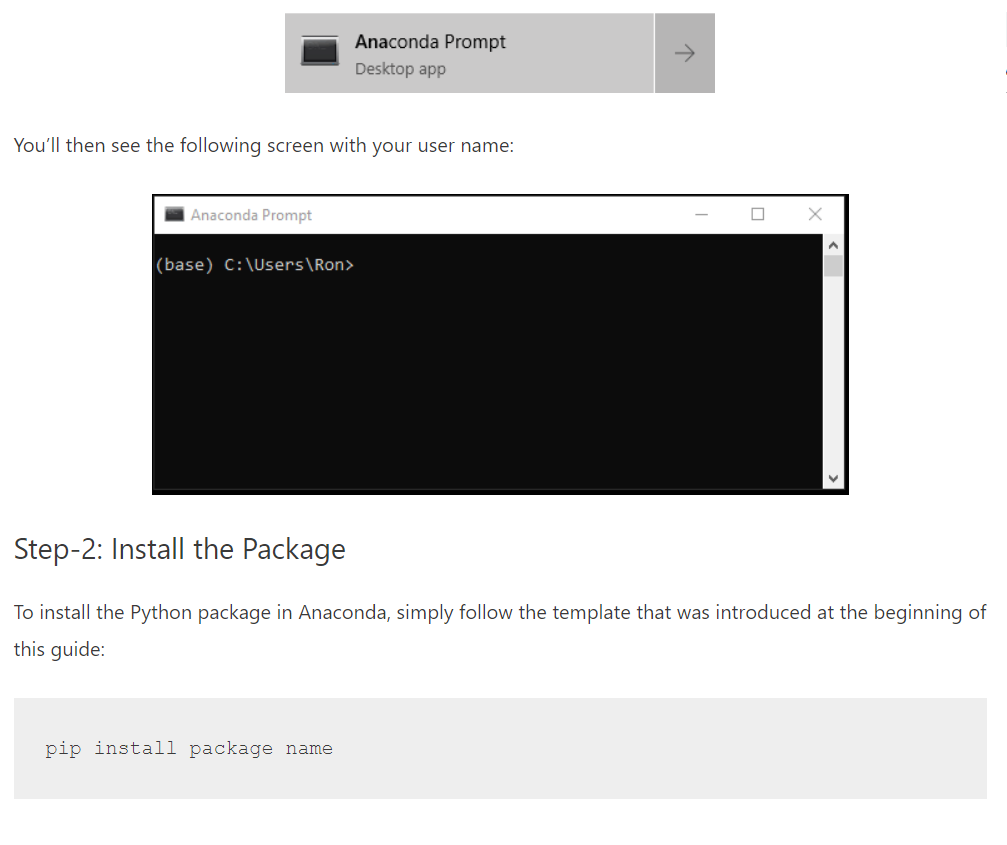

## 2. IMPORTING THE PACKAGES NEEDED FOR PY-FINANCE

For further reference go to: https://www.youtube.com/watch?v=2BrpKpWwT2A&t=241s 

In [119]:
# The modules that will be needed for develiping the content of this section are:

import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web

#We will configure the size of all graphs
plt.rcParams['figure.figsize']=(20,8)

## 2.1. GETTING INFORMATION FROM YAHOO FINANCE

In [120]:
style.use('ggplot')
start=dt.datetime(2000,1,1)
end =dt.datetime(2018,12,31)

In [121]:
# With these modules we can create a data frame
df = web.DataReader('TSLA',"yahoo", start,end)

In [122]:
# We retrieve the first 5 rows of the data frame
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [123]:
df.tail(6)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-21,323.470001,312.440002,317.399994,319.769989,8016800,319.769989
2018-12-24,314.500000,295.200012,313.500000,295.390015,5559900,295.390015
2018-12-26,326.970001,294.089996,300.000000,326.089996,8163100,326.089996
2018-12-27,322.170013,301.500000,319.839996,316.130005,8575100,316.130005
2018-12-28,336.239990,318.410004,323.100006,333.869995,9939000,333.869995
2018-12-31,339.209991,325.260010,337.790009,332.799988,6302300,332.799988


## 2.2 INPUT AND OUTPUT

In [124]:
# We can export any dataframe to .csv. This is a method that can be applied to the object df.
# This will be stored in the same directory as this notebook
# We will see that the date has become the index

df.to_csv('tsla.csv')

In [125]:
# We can do it all over again
df=pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [126]:
print(df.head())

             High        Low       Open      Close    Volume  Adj Close
Date                                                                   
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001


Note this time that we will have and index column.

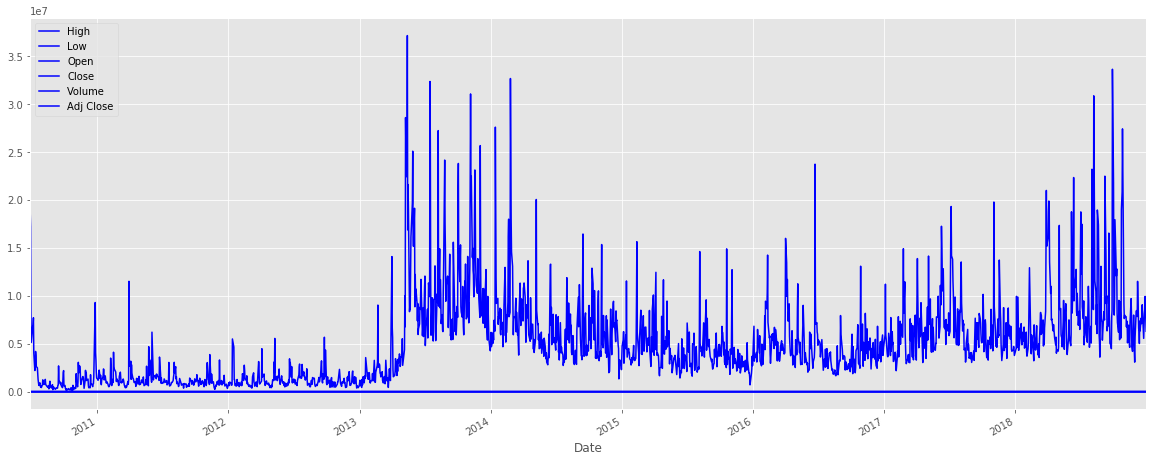

In [127]:
plt.rcParams['figure.figsize']=(20,8)
df.plot(color='blue')
plt.show()

In [128]:
# Panda plots are very convenient, for example
print(df["High"])

Date
2010-06-29     25.000000
2010-06-30     30.420000
2010-07-01     25.920000
2010-07-02     23.100000
2010-07-06     20.000000
                 ...    
2018-12-24    314.500000
2018-12-26    326.970001
2018-12-27    322.170013
2018-12-28    336.239990
2018-12-31    339.209991
Name: High, Length: 2142, dtype: float64


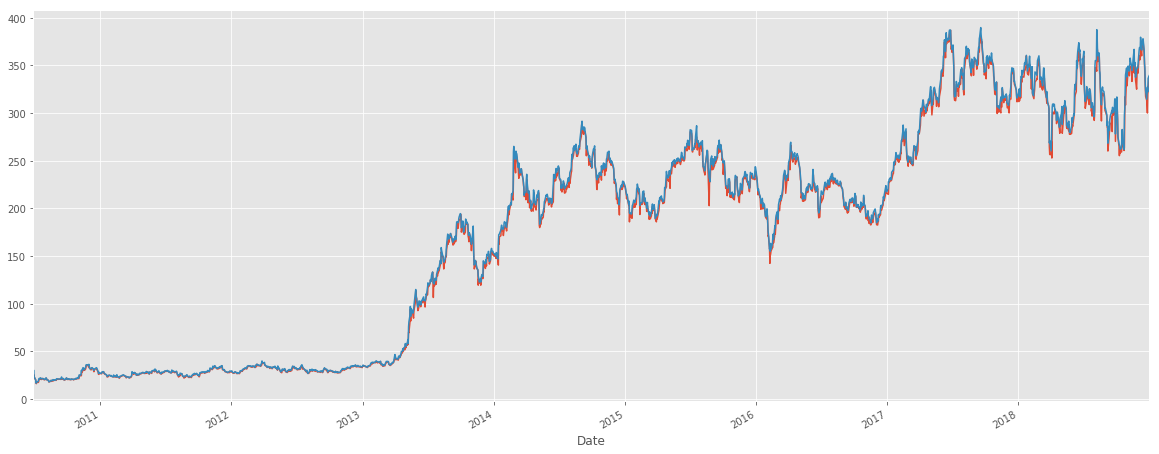

In [129]:
df['Open'].plot()
df['High'].plot()
plt.show()

## 2.3. DATA MANIPULATION

In [130]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web

In [131]:
df=pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

#### 2.3.1. MOVING AVERAGES

In [132]:
# How to create a new column with pandas
df['100ma']= df['Adj Close'].rolling(window=100).mean()
df['20ma']= df['Adj Close'].rolling(window=20).mean()
df['signal']=df['20ma']-df['100ma']

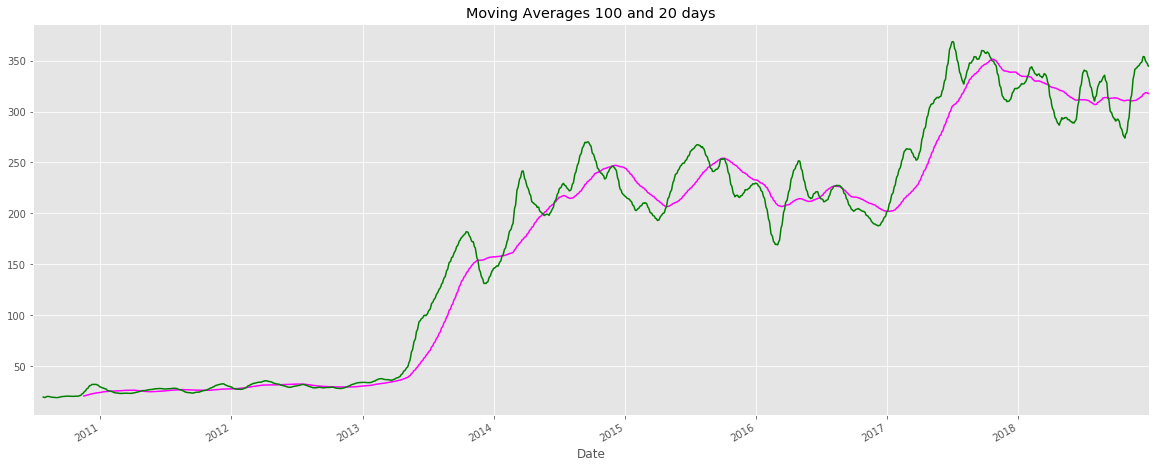

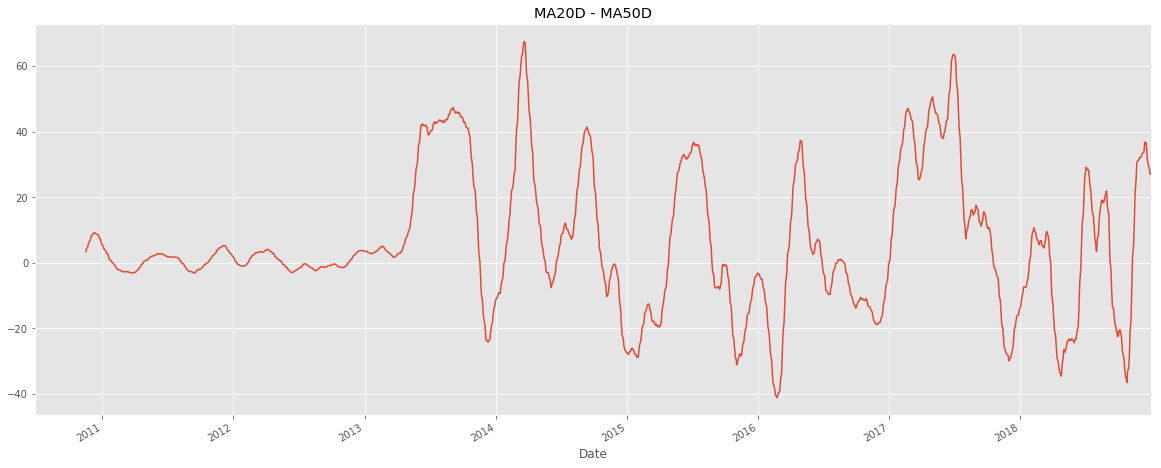

In [133]:
#df['Adj Close'].plot(color='blue')
df['100ma'].plot(color='magenta')
df['20ma'].plot(color='green')
plt.title('Moving Averages 100 and 20 days')
plt.show()

df['signal'].plot()
plt.title('MA20D - MA50D')
plt.show()

#### 2.3.2. DEALING WITH MISSING DATA

There is a problem with the elimination of non existing numbers. This is scpecially relevant in the case of financial data.  The numbers are removed


In [134]:
df.dropna(inplace=True)

In [135]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma,20ma,signal
Date,,,,,,,,,
2010-11-17,30.750000,28.610001,30.200001,29.490000,750000,29.490000,20.9879,24.4145,3.4266
2010-11-18,30.740000,28.920000,30.670000,29.889999,956100,29.889999,21.0479,24.8715,3.8236
2010-11-19,31.370001,29.700001,30.160000,30.990000,1150500,30.990000,21.1195,25.3850,4.2655
2010-11-22,33.450001,31.500000,31.570000,33.400002,1529700,33.400002,21.2339,26.0125,4.7786
2010-11-23,35.680000,32.189999,33.290001,34.570000,1577800,34.570000,21.3876,26.6730,5.2854


In [136]:
# We can have moving averages that take 100 days, say or less

df=pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df['20ma']= df['Adj Close'].rolling(window=20,min_periods=0 ).mean()
df['100ma']= df['Adj Close'].rolling(window=100, min_periods=0).mean()
df['signal']=df['20ma']-df['100ma']

In [137]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,20ma,100ma,signal
Date,,,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,23.889999,23.889999,0.0
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,23.860000,23.860000,0.0
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,23.226666,23.226666,0.0
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,22.220000,22.220000,0.0
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,20.998000,20.998000,0.0


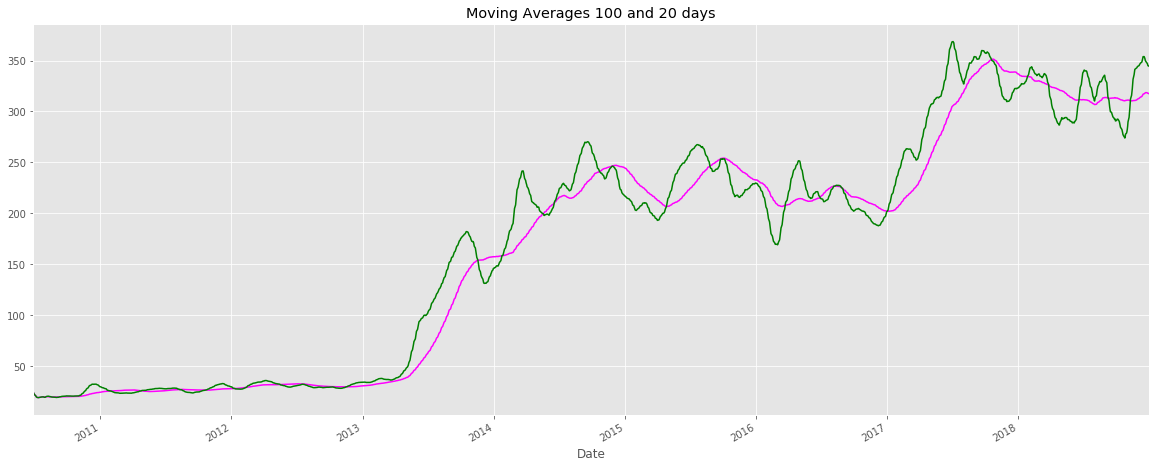

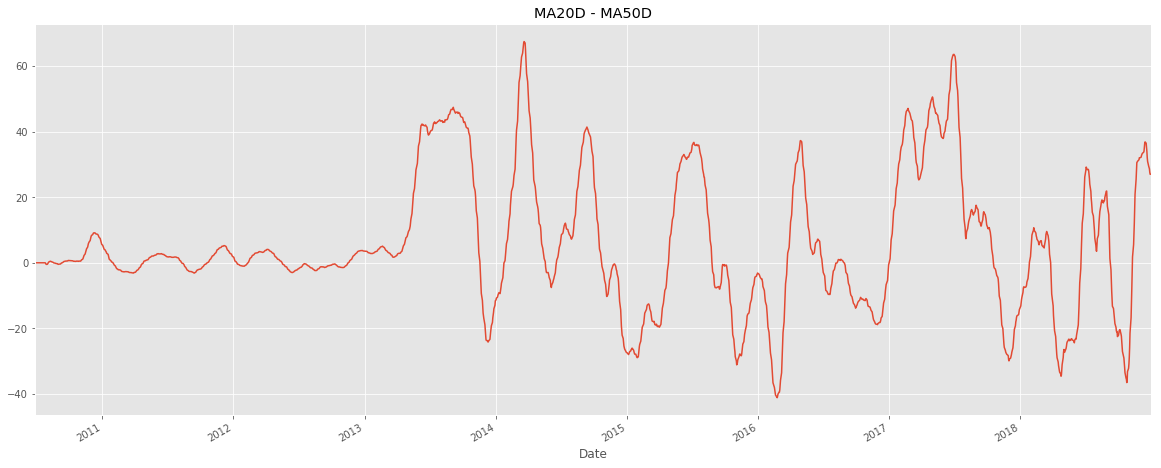

In [138]:
df['100ma'].plot(color='magenta')
df['20ma'].plot(color='green')
plt.title('Moving Averages 100 and 20 days')
plt.show()

df['signal'].plot()
plt.title('MA20D - MA50D')
plt.show()

#### 2.3.3. GRAPHING WITH MATPLOTLIB

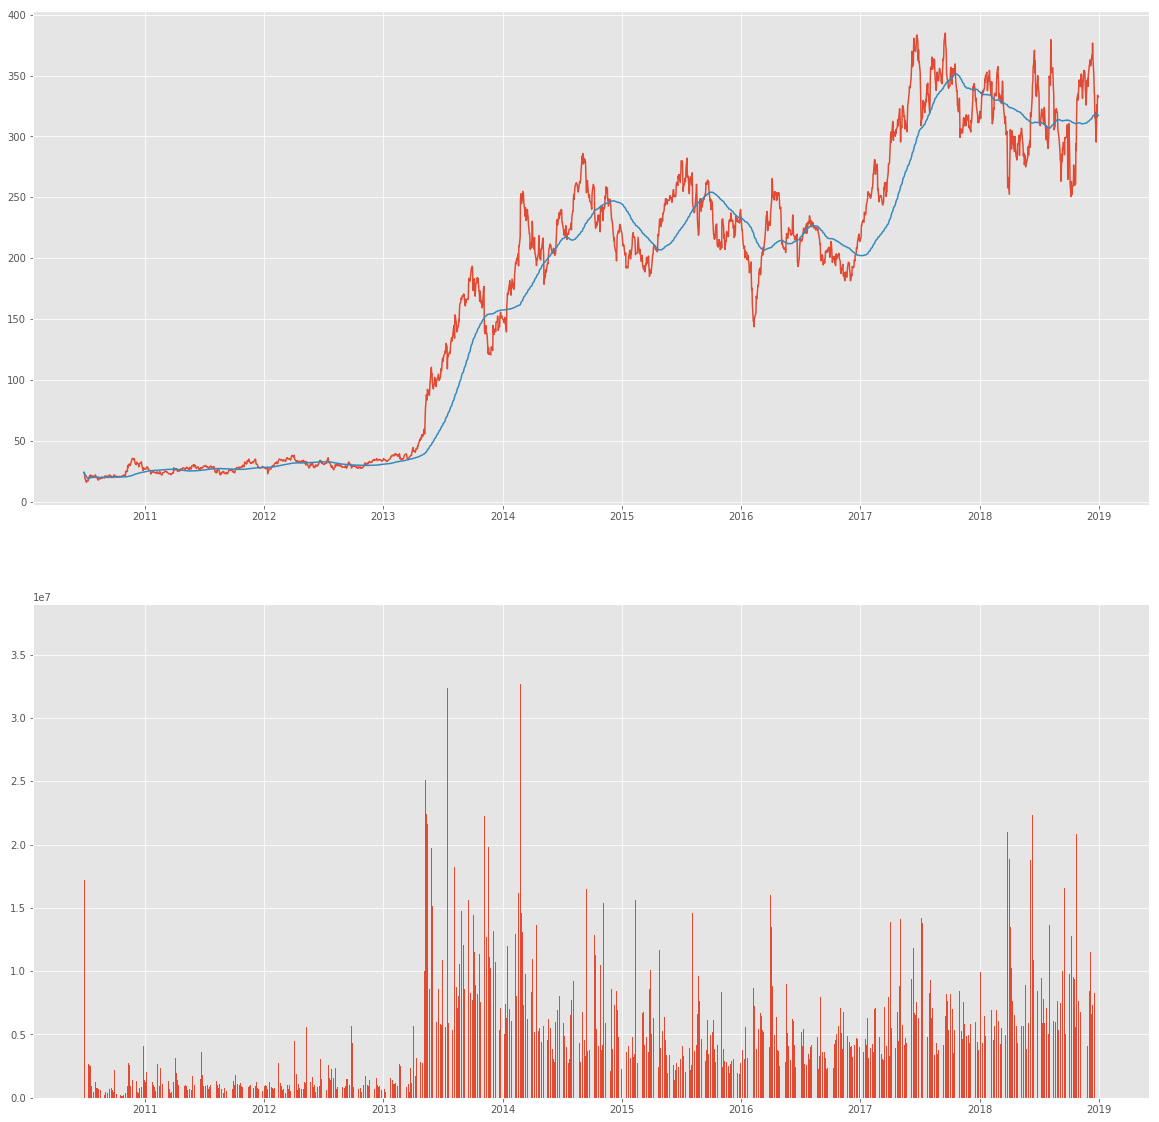

In [139]:
# In Matplotlib we will use axes
# We will create a template where to place all the graphs.
# Here we have two rows and one column
plt.rcParams['figure.figsize']=(20,20)

ax1=plt.subplot2grid((2,1), (0,0))
ax2=plt.subplot2grid((2,1), (1,0))

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

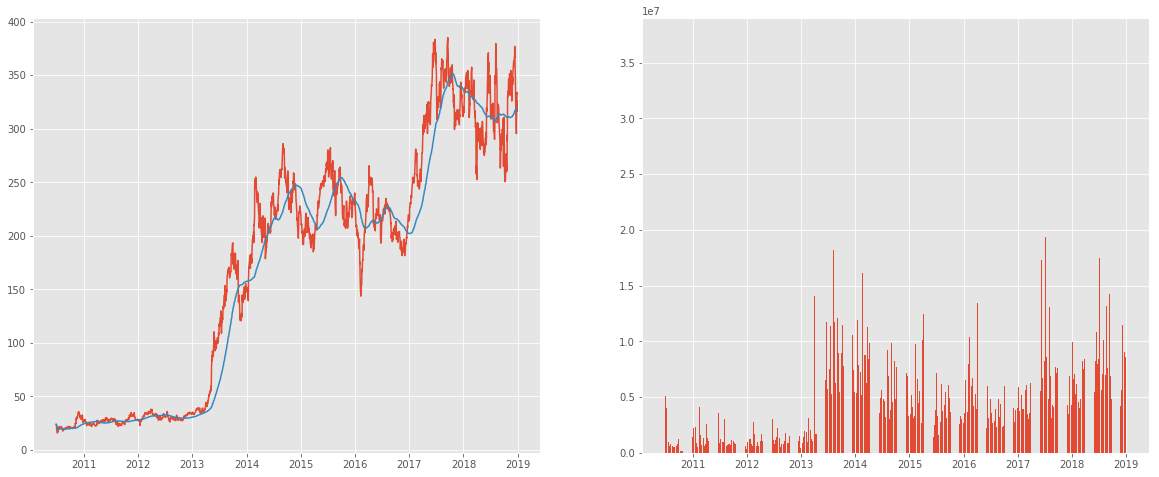

In [140]:
plt.rcParams['figure.figsize']=(20,8)

ax1=plt.subplot2grid((1,2), (0,0))
ax2=plt.subplot2grid((1,2), (0,1))

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

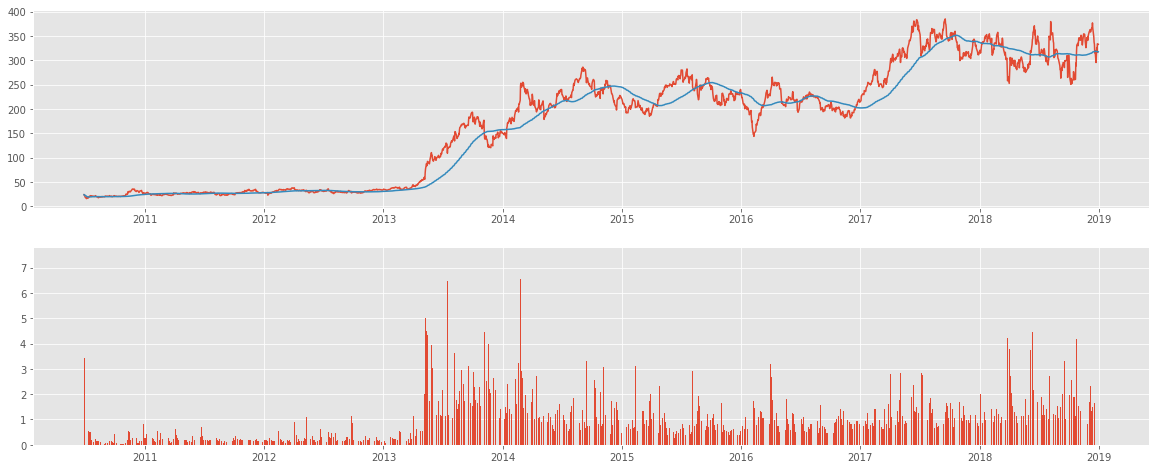

In [141]:
plt.rcParams['figure.figsize']=(20,8)

df['NVolume']=(df['Volume'])/np.mean(df['Volume'])

ax1=plt.subplot2grid((2,1), (0,0))
ax2=plt.subplot2grid((2,1), (1,0), sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['NVolume'])
plt.show()

## 2.4. ADVANCED DATA MANIPULATION

In [142]:
import datetime as dt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc


In [143]:
df=pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

#### 2.4.1. RESAMPLING DATA

In [144]:
# Instead of having daily data but it can be done sampled to 10 day 

df_old = df['Adj Close'].resample('10D').mean()
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()

In [145]:
# Note that this command generates the OHLC data frame
print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2010-06-29  23.889999  23.889999  15.800000  17.459999
2010-07-09  17.400000  20.639999  17.049999  20.639999
2010-07-19  21.910000  21.910000  20.219999  20.719999
2010-07-29  20.350000  21.950001  19.590000  19.590000
2010-08-08  19.600000  19.600000  17.600000  19.150000


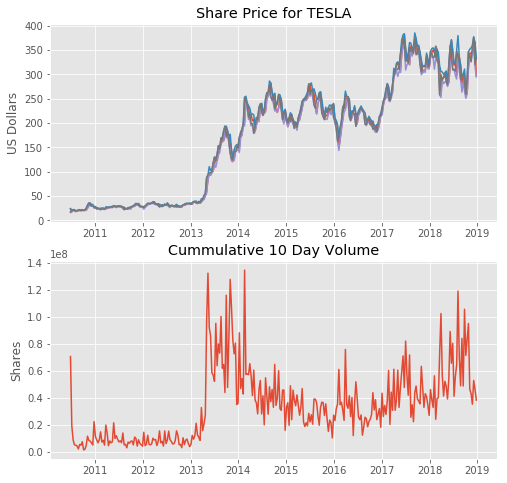

In [146]:
plt.rcParams['figure.figsize']=(8,8)

ax1=plt.subplot2grid((2,1), (0,0))
ax2=plt.subplot2grid((2,1), (1,0))


ax1.plot(df_ohlc)
ax1.set_title('Share Price for TESLA')
ax1.set_xlabel('')
ax1.set_ylabel('US Dollars')

ax2.plot(df_volume)
ax2.set_title('Cummulative 10 Day Volume')
ax2.set_xlabel('')
ax2.set_ylabel('Shares')

plt.show()

For the purpose of using matplotlib for candlestick, we need to use some internal date numbers.

This requieres a mapping from dates to this number.

In [147]:
# We will reset the data frame to have an index

df_ohlc.reset_index(inplace=True)
print(df_ohlc.head())
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

        Date       open       high        low      close
0 2010-06-29  23.889999  23.889999  15.800000  17.459999
1 2010-07-09  17.400000  20.639999  17.049999  20.639999
2 2010-07-19  21.910000  21.910000  20.219999  20.719999
3 2010-07-29  20.350000  21.950001  19.590000  19.590000
4 2010-08-08  19.600000  19.600000  17.600000  19.150000
       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


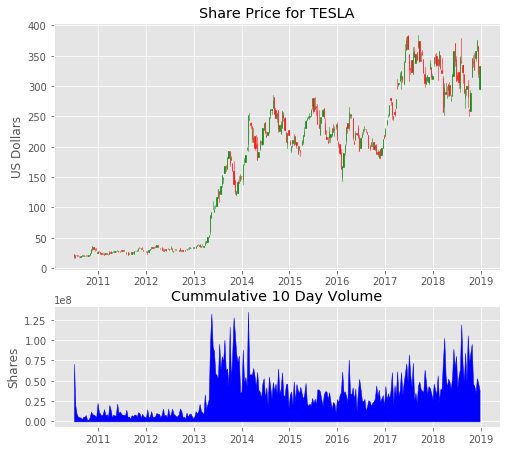

In [148]:
plt.rcParams['figure.figsize']=(8,8)

ax1=plt.subplot2grid((14,1), (0,0), rowspan=8, colspan=1)
ax2=plt.subplot2grid((14,1), (9,0), rowspan=4, colspan=1, sharex=ax1)

ax1.xaxis_date()
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax1.set_title('Share Price for TESLA')
ax1.set_xlabel('')
ax1.set_ylabel('US Dollars')

ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, color='blue')
ax2.set_title('Cummulative 10 Day Volume')
ax2.set_xlabel('')
ax2.set_ylabel('Shares')

plt.show()

## 2.5. GETTING DATA AUTOMATICALY : USING "BEAUTIFUL SOUP", "PICKLE" AND "REQUESTS"

In [149]:
#### We will include additional packages for handling financial data. BEautiful Soup, Pickle and Requests

import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader as web
import pickle
import requests

In [150]:
# We will create a method for bringing the S&P500 list anytime we want

In [151]:
def save_sp500_tickers():
    resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup=bs.BeautifulSoup(resp.text, "lxml")
    table= soup.find('table', {'class' : 'wikitable sortable'})
    tickers=[]
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker.strip('\n'))
        
        with open("sp500tickers.pickle", "wb") as f:
            pickle.dump(tickers,f)
    
    return tickers

In [152]:
save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'ANET',
 'AJG',
 'AIZ',
 'ATO',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CPRI',
 'CAH',
 'KMX',
 'CCL',
 'CAT',
 'CBOE',
 'CBRE',
 'CBS',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',

## 3. RETURNING THE S&P500 YAHOO DATASET

In [153]:
# We create a function that could use existing tickers or reload them

def get_data_from_yahoo(reload_sp500=False):
    
    if reload_sp500:
        tickers=save_sp500_tickers()
        
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers=pickle.load(f)
            
# Now we will collect all the data an place it in a directory  
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2000,1,1)
    finish = dt.datetime(2018,12,31)
    
    for ticker in tickers[400:499]:
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df=web.DataReader(ticker,'yahoo',start, finish)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else: 
            print('Already have {}'.format(ticker))
    

In [154]:
get_data_from_yahoo()

Already have REG
Already have REGN
Already have RF
Already have RSG
Already have RMD
Already have RHI
Already have ROK
Already have ROL
Already have ROP
Already have ROST
Already have RCL
Already have SPGI
Already have CRM
Already have SBAC
Already have SLB
Already have STX
Already have SEE
Already have SRE
Already have NOW
Already have SHW
Already have SPG
Already have SWKS
Already have SLG
Already have SNA
Already have SO
Already have LUV
Already have SWK
Already have SBUX
Already have STT
Already have SYK
Already have STI
Already have SIVB
Already have SYF
Already have SNPS
Already have SYY
Already have TMUS
Already have TROW
Already have TTWO
Already have TPR
Already have TGT
Already have TEL
Already have FTI
Already have TFX
Already have TXN
Already have TXT
Already have TMO
Already have TIF
Already have TWTR
Already have TJX
Already have TSCO
Already have TDG
Already have TRV
Already have TRIP
Already have TSN
Already have UDR
Already have ULTA
Already have USB
Already have UAA
A

### 3.1. CORRELATION FOR THE LAST 100 STOCKS

#### 3.1.1. COMPILING THE DATA IN ONE DATA FRAME

In [155]:
# We create a function to generate a large dataframe with the 18 year daily stock prices
def compile_data():
    with open('sp500tickers.pickle', 'rb') as f:
        tickers=pickle.load(f)[400:499]
    #We create an empty Data Frame
    main_df= pd.DataFrame()
    # Here is an interesting way of iteriting. Using enumerate creates an enumerator
    for count, ticker in enumerate(tickers):
        df=pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        # This cleans the df of each stock
        df.set_index('Date', inplace=True)
        # we use the inplace=True to, eliminate NaN and to make the functions workable
        df.rename(columns={'Adj Close': ticker}, inplace=True)
        df.drop(['Open','High','Low','Close','Volume'],1, inplace=True)
        #Now, we will begin to populate each data frame
        if main_df.empty:
            main_df=df
        else:
            main_df=main_df.join(df, how='outer')
        
        if count % 10 ==0:
            print(count)
            
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


In [156]:
compile_data()

0
10
20
30
40
50
60
70
80
90
                 REG     REGN         RF       RSG       RMD        RHI  \
Date                                                                      
2000-01-03  7.701966  12.3125  10.356320  6.275621  4.469048  10.609947   
2000-01-04  7.726110  12.0000  10.053343  5.886861  4.448547  10.040288   
2000-01-05  7.677819  11.5000   9.998256  5.775794  4.448547   9.850401   
2000-01-06  7.726110  11.6250  10.025799  5.748021  4.455381   9.850401   
2000-01-07  7.991691  13.0000  10.135973  6.053474  4.469048  10.040288   

                  ROK       ROL        ROP      ROST  ...       WDC  WU  WRK  \
Date                                                  ...                      
2000-01-03  11.715097  0.441143  14.871428  1.807948  ...  3.156921 NaN  NaN   
2000-01-04  11.285043  0.437512  14.191883  1.729907  ...  3.758239 NaN  NaN   
2000-01-05  11.344368  0.435696  14.008931  1.768928  ...  3.507690 NaN  NaN   
2000-01-06  11.121925  0.439327  14.008931  1

#### 3.1.2. CALCULATING AND VISUALIZING THE CORRELATION MATRIX

In [157]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
#style.use('ggplot')

plt.rcParams['figure.figsize']=(15,4)

def visualize_data():
    df=pd.read_csv("sp500_joined_closes.csv")
    fig=df["REG"].plot()
    fig.set_title("Adjusted Close for REG")
    plt.grid(True, color='grey', linestyle='--', linewidth=1)
    plt.show()

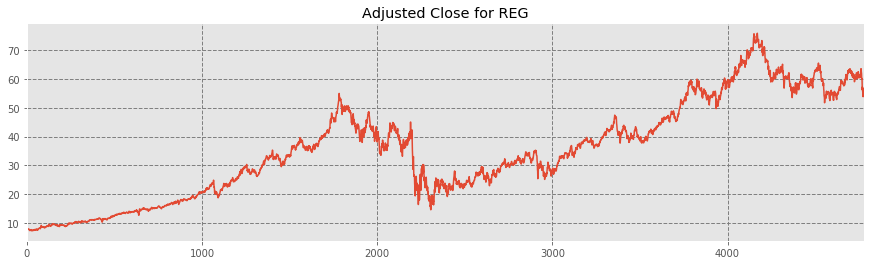

In [158]:
visualize_data()

In [159]:
def visualize_data_new(stock):
    df=pd.read_csv("sp500_joined_closes.csv")
    fig=df[stock].plot()
    fig.set_title("Adjusted Close for "+ stock)
    plt.grid(True, color='grey', linestyle='--', linewidth=1)
    plt.show()

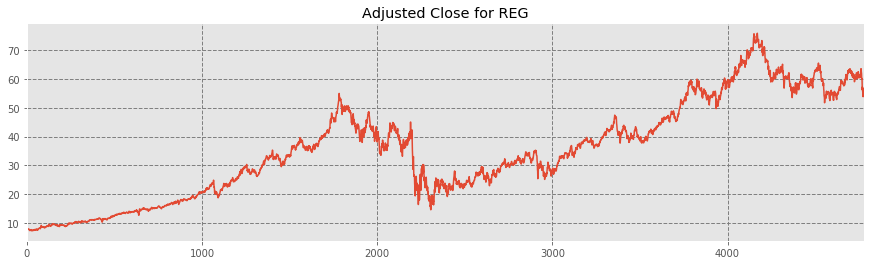

In [160]:
visualize_data_new("REG")

In [161]:
def visualize_data():
    df=pd.read_csv("sp500_joined_closes.csv")
    # We can get the correlation between the columns of a data frame as follows
    df_corr=df.corr()
    print(df_corr.head())
    data=df_corr.values
    # only use the data
    print(data)
    #plt.show()

In [162]:
visualize_data()

           REG      REGN        RF       RSG       RMD       RHI       ROK  \
REG   1.000000  0.801941 -0.001276  0.870388  0.827933  0.808191  0.865624   
REGN  0.801941  1.000000 -0.261788  0.821428  0.848469  0.856473  0.853743   
RF   -0.001276 -0.261788  1.000000 -0.105613 -0.151979 -0.014289 -0.102523   
RSG   0.870388  0.821428 -0.105613  1.000000  0.972970  0.878824  0.968262   
RMD   0.827933  0.848469 -0.151979  0.972970  1.000000  0.919572  0.963322   

           ROL       ROP      ROST  ...       WDC        WU       WRK  \
REG   0.788862  0.849473  0.823504  ...  0.779403  0.723760 -0.482281   
REGN  0.833753  0.886600  0.887404  ...  0.886392  0.464471 -0.217739   
RF   -0.131978 -0.178284 -0.191539  ... -0.289260  0.514539  0.831699   
RSG   0.976137  0.976217  0.956902  ...  0.828542  0.656479  0.651506   
RMD   0.981904  0.986891  0.974999  ...  0.847188  0.564533  0.600739   

            WY       WHR       WMB      WLTW      WYNN       XEL       XRX  
REG   0.041182 

In [163]:
def visualize_data():
    df=pd.read_csv("sp500_joined_closes.csv")
    
    # We can get the correlation between the columns of a data frame as follows
    df_corr=df.corr()
    data=df_corr.values
    
    # Now we can create a graph
    fig=plt.figure()
    
    # This canvas needs some axes
    ax=fig.add_subplot(1,1,1)
    
    #We invoke a method to paint somethind on the ax axes
    
    heatmap=ax.pcolor(data,cmap=plt.cm.RdYlGn)
    # Each figure has a colormap. There are many variations
    # This creates an object that will be a legend of how to read the colors.
    fig.colorbar(heatmap)
    
    
    # Go back to the axes to determine its propertiesas
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels=df_corr.columns
    row_labels=df_corr.index
    
    ax.set_xticklabels(row_labels)
    ax.set_yticklabels(column_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    # Thiw improves the quality of the graph
    plt.tight_layout()
    
    plt.show()

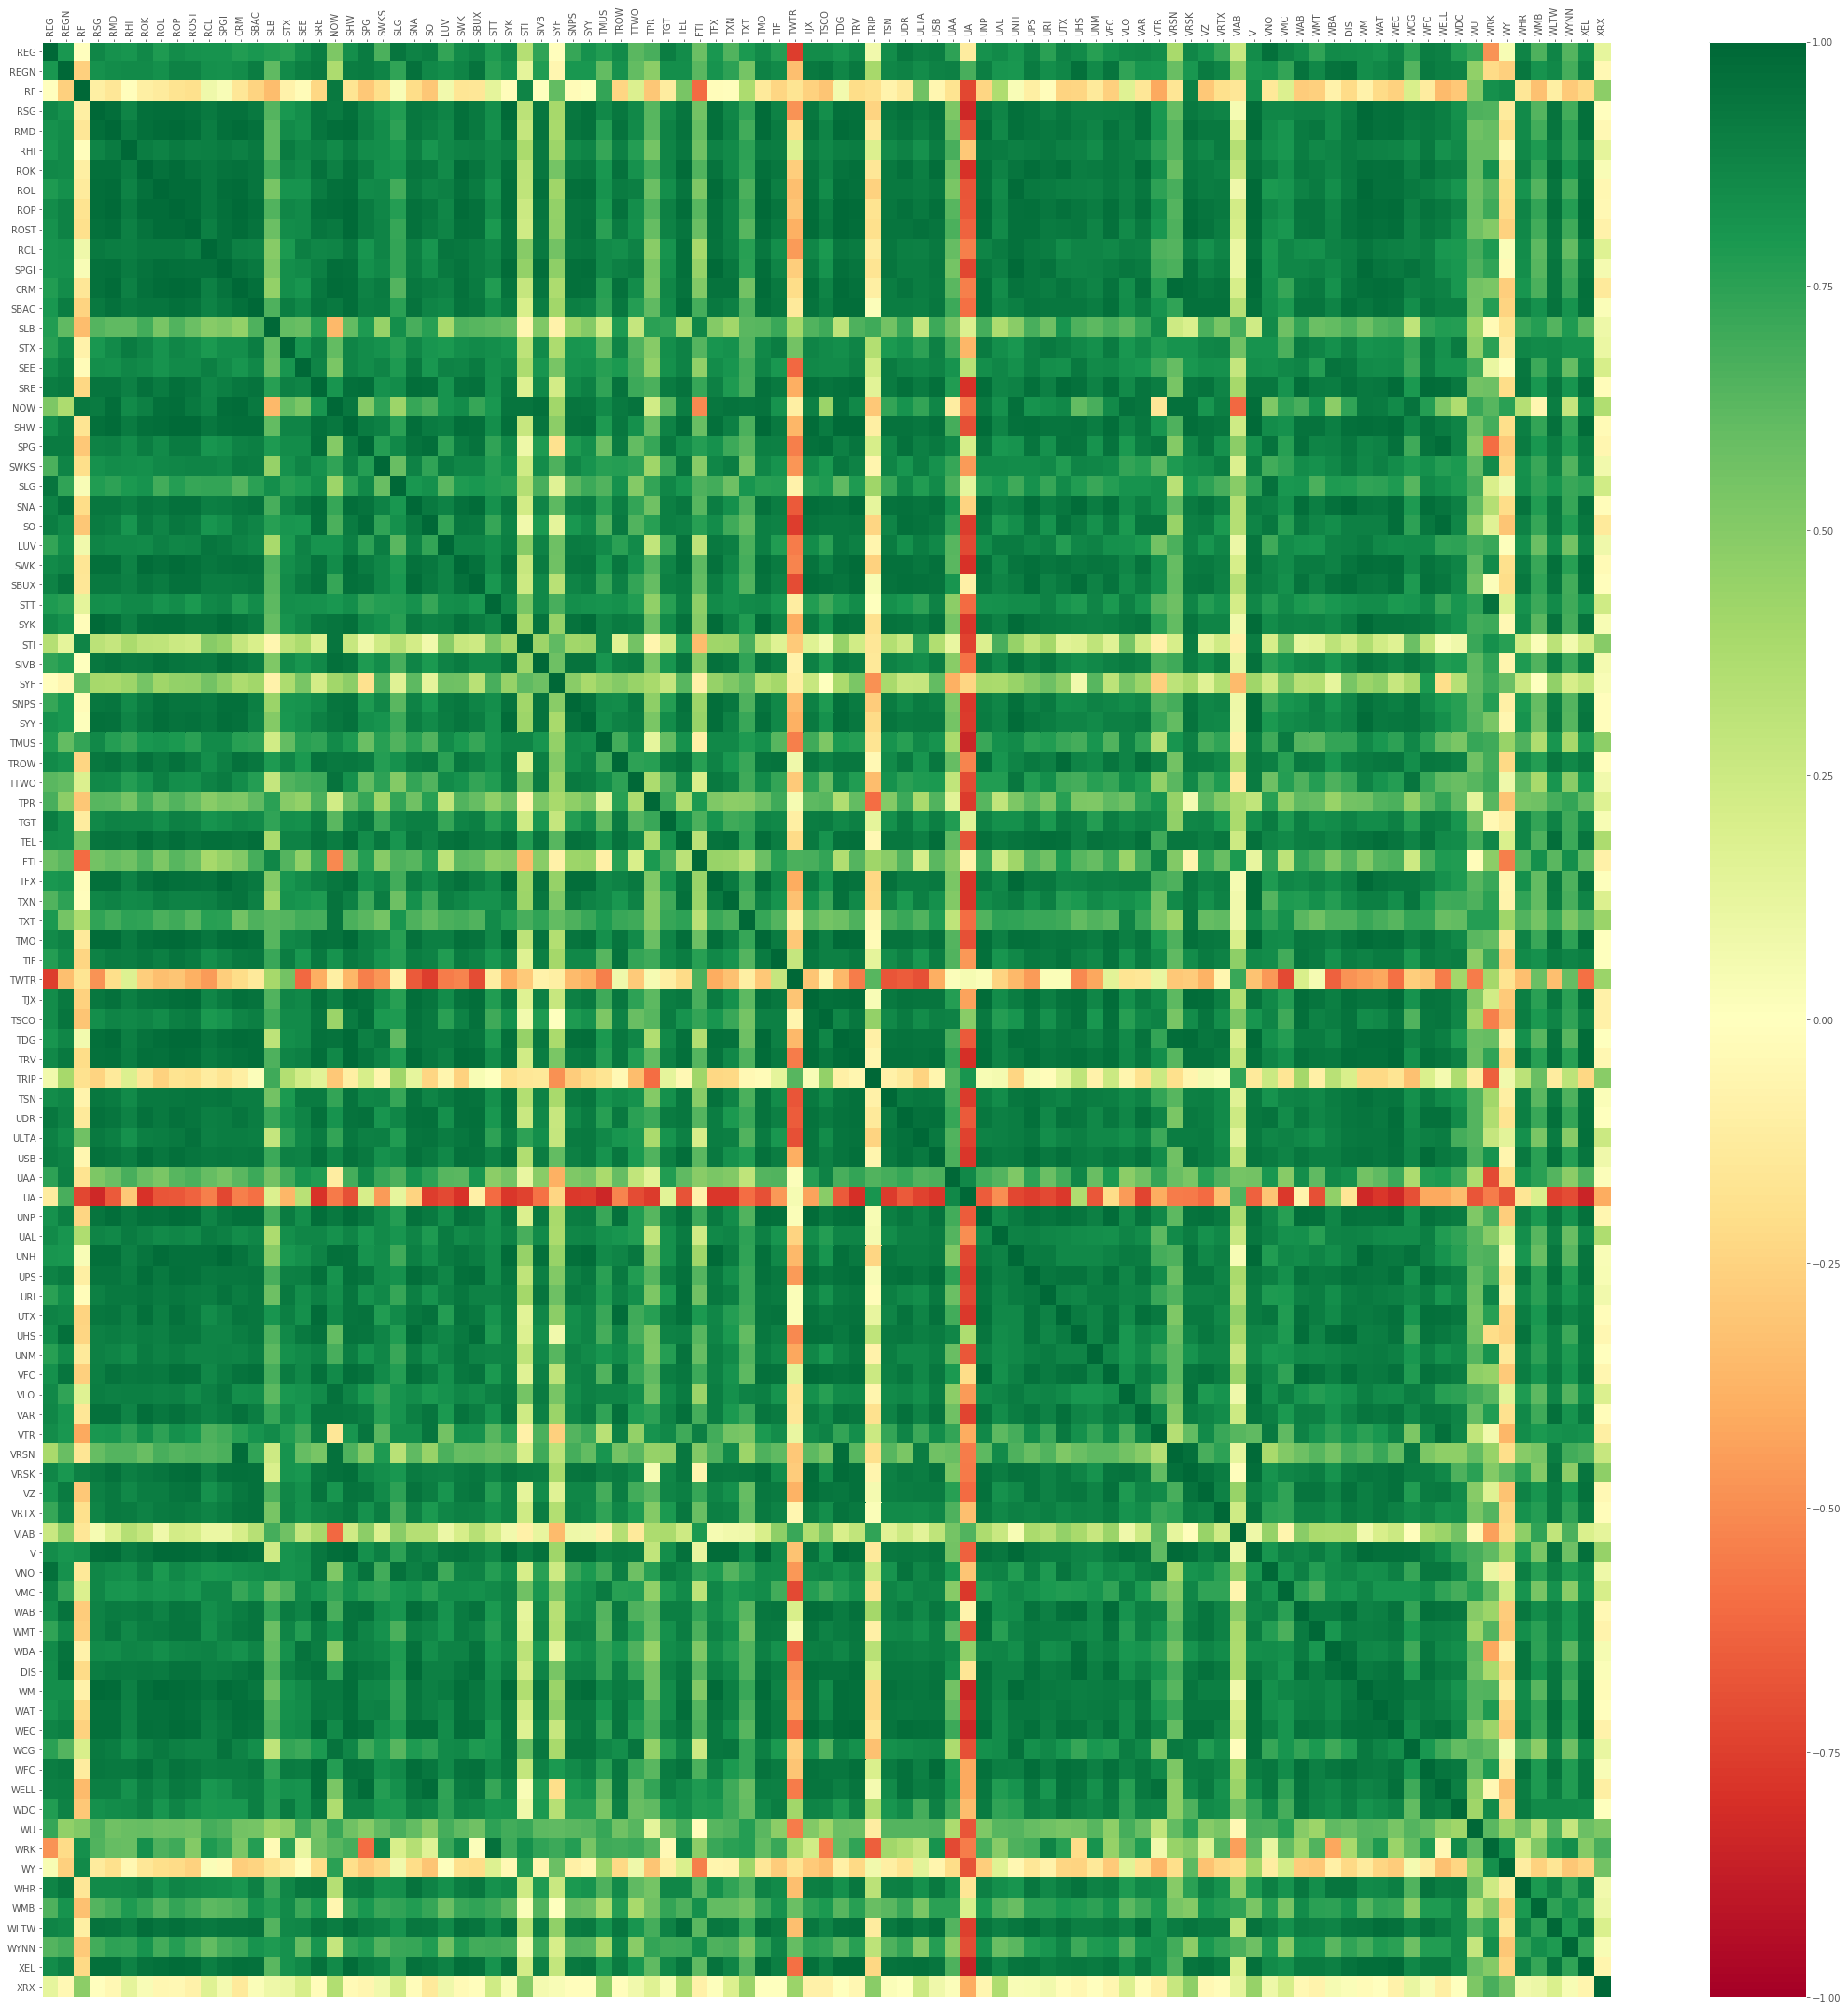

In [168]:
plt.rcParams['figure.figsize']=(30,30)
visualize_data()